In [1]:
import pandas as pd
dataset=pd.read_csv('hw_200.csv')


ModuleNotFoundError: No module named 'pandas'

In [2]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [3]:
pip install pandas

     |████████████████████████████████| 11.3 MB 4.7 MB/s            
     |████████████████████████████████| 15.7 MB 46.6 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
dataset=pd.read_csv('hw_200.csv')

In [6]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [7]:
print(dataset.head())

   Index   Height(Inches)"   "Weight(Pounds)"
0      1             65.78             112.99
1      2             71.52             136.49
2      3             69.40             153.03
3      4             68.22             142.34
4      5             67.79             144.30


In [9]:
features=dataset.iloc[:,1:].values

In [10]:
print(type(features))

<class 'numpy.ndarray'>


In [11]:
print(features[:5,:])

[[ 65.78 112.99]
 [ 71.52 136.49]
 [ 69.4  153.03]
 [ 68.22 142.34]
 [ 67.79 144.3 ]]


In [14]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [13]:
pip install matplotlib.pyplot


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install matplotlib

     |████████████████████████████████| 11.2 MB 4.9 MB/s            
     |████████████████████████████████| 3.1 MB 75.1 MB/s            
     |████████████████████████████████| 890 kB 75.4 MB/s            
     |████████████████████████████████| 1.1 MB 77.8 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [16]:
import matplotlib.pyplot as plt

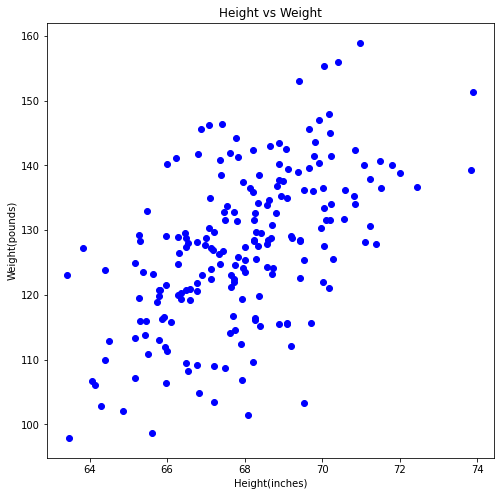

In [18]:
plt.figure(figsize=(8,8))
plt.scatter(features[:,0],features[:,1],c='blue')
plt.title('Height vs Weight')
plt.xlabel('Height(inches)')
plt.ylabel('Weight(pounds)')
plt.show()

In [19]:
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'sklearn'

In [20]:
pip install sklearn

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 24.8 MB 4.7 MB/s            
     |████████████████████████████████| 38.1 MB 72.8 MB/s            
     |████████████████████████████████| 306 kB 73.4 MB/s            
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=0ac2245670ae31db8d55a0282b332a2c390ce684293412243505de9502065b22
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


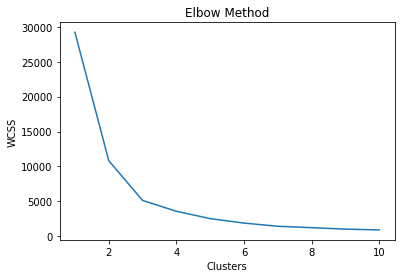

In [22]:
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    model=KMeans(n_clusters=k,init='k-means++')
    model.fit(features)
    wcss.append(model.inertia_)
    
plt.plot(range(1,11),wcss)
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [24]:
k=3
model=KMeans(n_clusters=k,init='k-means++')
model.fit(features)
print(model.cluster_centers_)

[[ 67.59397849 126.05021505]
 [ 69.37269841 140.65984127]
 [ 66.66454545 110.45795455]]


In [25]:
labels=model.predict(features)
print(labels) #since 3 clusters so labels=0,1,2

[2 1 1 1 1 0 1 1 2 0 0 2 0 0 2 1 0 1 1 0 1 1 2 0 1 0 1 0 2 2 2 0 0 1 1 0 1
 0 0 2 0 0 1 1 2 0 1 2 1 1 1 0 0 2 0 1 1 0 0 1 0 1 0 0 1 2 1 0 2 0 0 1 1 2
 0 0 1 0 2 0 1 0 1 0 0 1 1 0 0 0 1 1 1 2 1 0 0 0 0 2 2 0 1 2 2 0 0 0 0 0 0
 0 0 2 0 0 0 1 2 1 0 2 0 1 2 0 2 0 1 1 0 0 2 0 0 1 2 0 1 0 1 2 0 0 2 2 1 2
 0 1 0 1 0 1 1 2 1 2 1 2 1 2 1 0 0 0 2 0 0 2 0 0 0 0 1 2 0 0 0 0 1 2 2 0 1
 0 0 0 0 2 1 2 0 1 1 0 2 0 0 0]


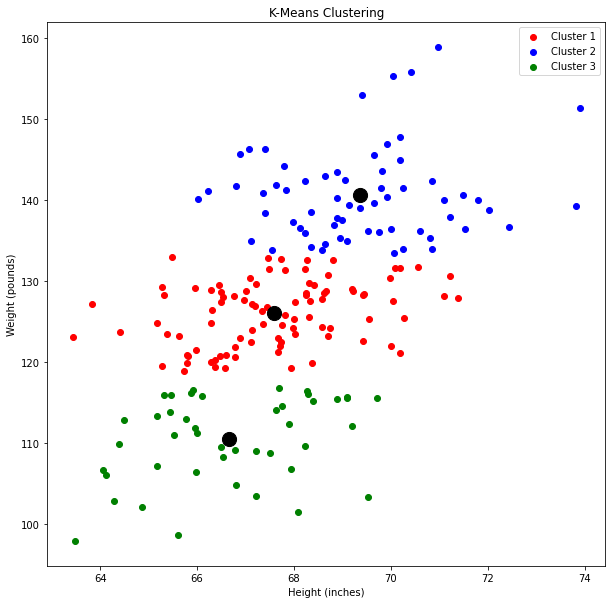

In [28]:
plt.figure(figsize=(10,10))
plt.scatter(features[labels==0,0],features[labels==0,1],c='red',label='Cluster 1')
plt.scatter(features[labels==1,0],features[labels==1,1],c='blue',label='Cluster 2')
plt.scatter(features[labels==2,0],features[labels==2,1],c='green',label='Cluster 3')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='black',s=200)
plt.title('K-Means Clustering')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.legend()
plt.show()
